In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder

In [112]:
data = pd.read_csv("all_patients_clustered_data.csv")

In [113]:
data.head()

,Filename,ID,BCODE,UID1,UID2,Age,Sex,Smoke,Smoke_amount,Height,...,50th_quantile,75th_quantile,Cluster_number2,Cluster_number3,Cluster_number4,Cluster_number5,Cluster_number6,Cluster_number7,Cluster_number8,Cluster_number9
0,SB-001-Imputed.csv,SB-001,14631875,BC4386476,NaN,43,M,NS,0,156,...,360.0,380.0,1,2,3,4,0,5,2,0
1,SB-002-Imputed.csv,SB-002,14010074,BC3298156,NaN,66,M,NS,0,163,...,503.5,518.5,0,0,1,2,2,0,1,7
2,SB-003-Imputed.csv,SB-003,14221420,BC4165314,NaN,61,M,ES,20,173,...,470.0,470.0,0,0,1,2,3,0,1,7
3,SB-004-Imputed.csv,SB-004,14010592,BC4201070,NaN,49,M,NS,0,142,...,315.0,331.5,1,2,0,3,4,1,0,6
4,SB-005-Imputed.csv,SB-005,14010759,BC4212692,NaN,53,M,NS,0,156,...,218.0,236.0,1,2,0,3,4,1,0,6


In [114]:
data.describe()

,Age,Smoke_amount,Height,Weight,BMI,BSA,occupation_label,M_mean,M_median,M_std,...,50th_quantile,75th_quantile,Cluster_number2,Cluster_number3,Cluster_number4,Cluster_number5,Cluster_number6,Cluster_number7,Cluster_number8,Cluster_number9
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,64.101010,4.030303,161.515152,61.272727,23.445102,1.654692,6.202020,382.123737,379.712121,37.003232,...,381.810606,402.439394,0.747475,1.454545,1.212121,2.141414,2.727273,2.868687,2.212121,3.767677
std,13.019213,9.950341,8.110668,9.320614,2.844229,0.155113,2.948468,102.829569,107.957335,43.102232,...,107.700987,106.364454,0.436672,0.872163,1.311431,1.525364,1.817254,2.068453,1.885891,2.542810
min,30.000000,0.000000,142.000000,40.000000,17.313019,1.299573,0.000000,163.380000,133.000000,5.910000,...,132.000000,144.875000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.000000,0.000000,156.000000,54.000000,21.676022,1.531791,5.000000,307.950000,305.000000,19.170000,...,309.250000,330.750000,0.500000,0.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,65.000000,0.000000,162.000000,60.000000,23.191095,1.639444,6.000000,357.900000,360.000000,28.130000,...,360.000000,380.500000,1.000000,2.000000,1.000000,2.000000,3.000000,3.000000,2.000000,4.000000
75%,72.000000,0.000000,166.000000,67.500000,25.128639,1.776778,8.000000,440.885000,442.500000,37.735000,...,443.750000,465.000000,1.000000,2.000000,3.000000,3.000000,4.000000,5.000000,4.000000,6.000000
max,90.000000,60.000000,187.000000,83.000000,32.830980,1.990812,11.000000,635.770000,635.000000,345.860000,...,627.000000,655.375000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000


In [115]:
cluster_counts = data['Cluster_number3'].value_counts()
cluster_counts

Cluster_number3
2    70
0    25
1     4
Name: count, dtype: int64

In [116]:
cluster_counts = data['Cluster_number4'].value_counts()
cluster_counts

Cluster_number4
0    45
3    31
1    19
2     4
Name: count, dtype: int64

In [117]:
cluster_counts = data['Cluster_number5'].value_counts()
cluster_counts

Cluster_number5
0    27
3    26
4    23
2    19
1     4
Name: count, dtype: int64

In [118]:
cluster_counts = data['Cluster_number6'].value_counts()
cluster_counts

Cluster_number6
4    25
0    22
5    19
2    16
3    13
1     4
Name: count, dtype: int64

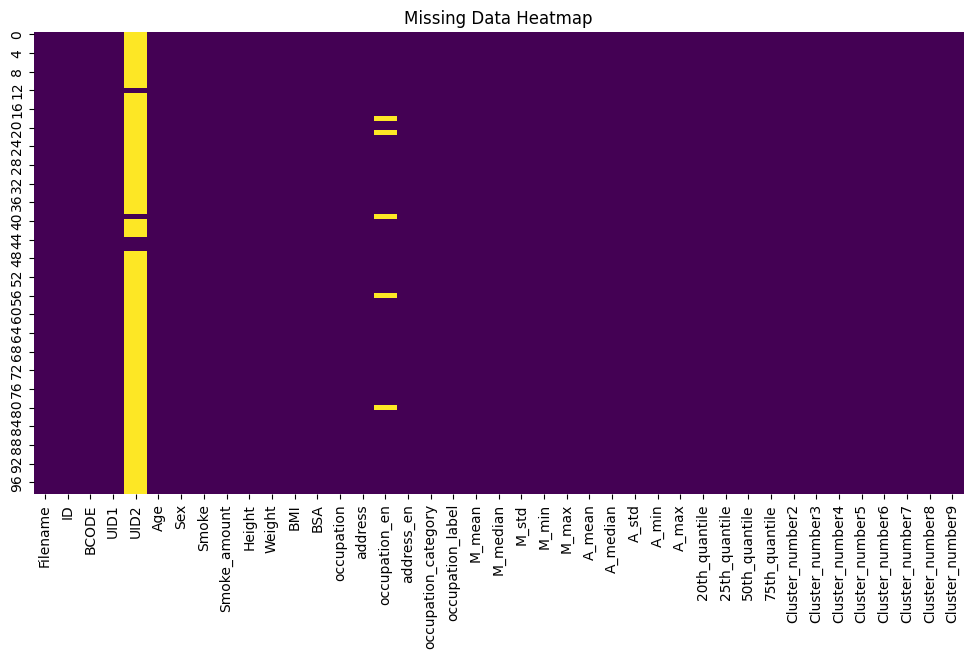

In [119]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [120]:
le = LabelEncoder()

# Fit and transform the column
data['smoker_label'] = le.fit_transform(data['Smoke'])
data['sex_label'] = le.fit_transform(data['Sex'])


In [121]:
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
print("\nNumerical Columns:")
print(numerical_columns)


Numerical Columns:
['Age', 'Smoke_amount', 'Height', 'Weight', 'BMI', 'BSA', 'occupation_label', 'M_mean', 'M_median', 'M_std', 'M_min', 'M_max', 'A_mean', 'A_median', 'A_std', 'A_min', 'A_max', '20th_quantile', '25th_quantile', '50th_quantile', '75th_quantile', 'Cluster_number2', 'Cluster_number3', 'Cluster_number4', 'Cluster_number5', 'Cluster_number6', 'Cluster_number7', 'Cluster_number8', 'Cluster_number9', 'smoker_label', 'sex_label']


In [122]:
# num_cols = 3  # Number of columns in the subplot grid
# num_rows = math.ceil(len(numerical_columns) / num_cols)  # Calculate the number of rows

# plt.figure(figsize=(num_cols * 5, num_rows * 4))  # Adjust figure size based on number of plots
# for i, col in enumerate(numerical_columns):
#     plt.subplot(num_rows, num_cols, i + 1)
#     sns.boxplot(y=data[col])
#     plt.title(f"Boxplot of {col}")
# plt.tight_layout()
# plt.show()

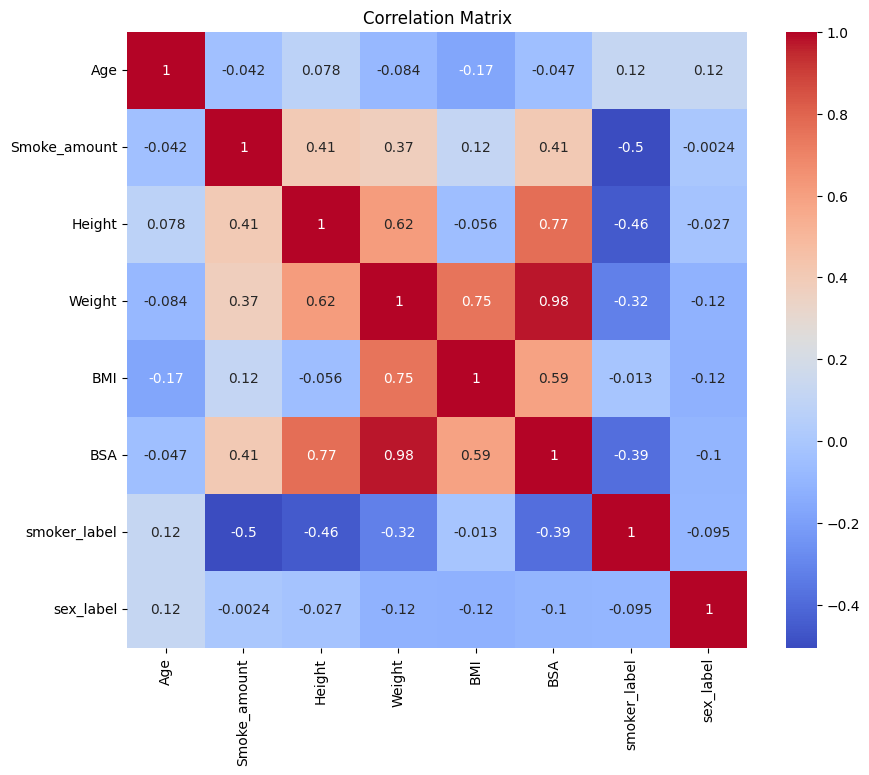

In [123]:
correlation_matrix = data[['Age','Smoke_amount','Height','Weight','BMI','BSA','smoker_label', 'sex_label']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

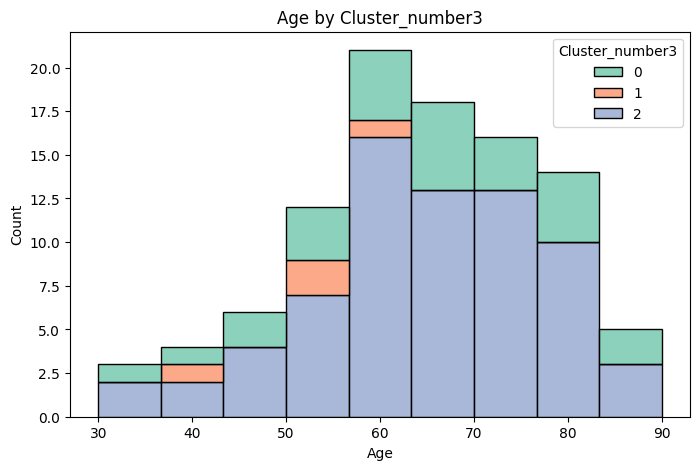

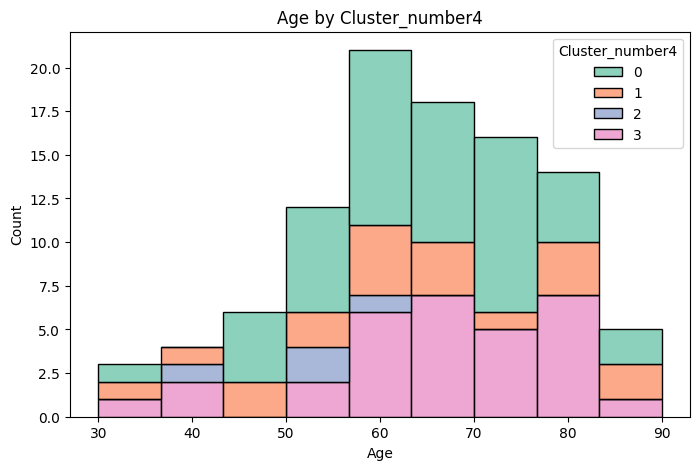

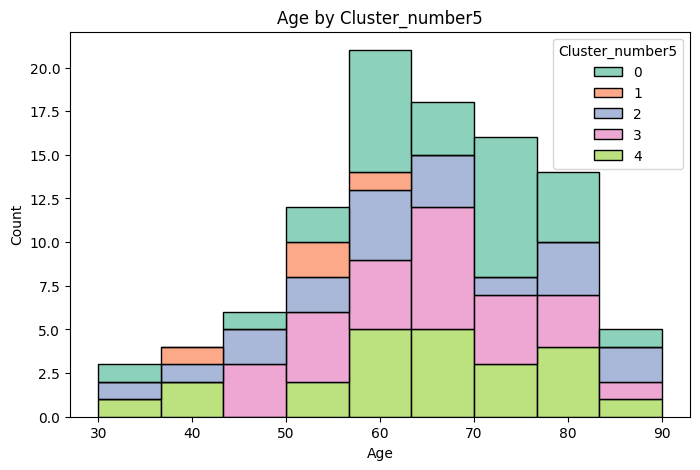

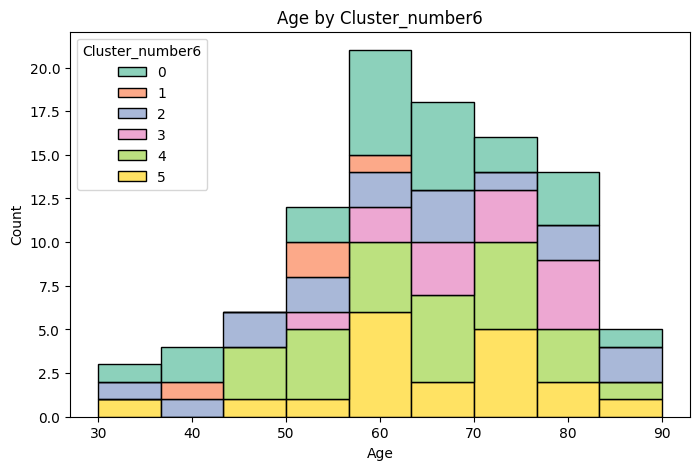

In [124]:
cluster_columns = ['Cluster_number3', 'Cluster_number4', 'Cluster_number5', 'Cluster_number6']

# Loop through each cluster column and generate a plot
for cluster_col in cluster_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=data, x='Age', hue=cluster_col, multiple='stack', palette='Set2')
    
    plt.title(f'Age by {cluster_col}')
    plt.show()


In [125]:
# plt.figure(figsize=(10,6))

# sns.histplot(data=data, x='Age', hue='Cluster_number3', multiple='stack', palette='Set2')

# plt.title('Age by Cluster_number3')
# plt.show()

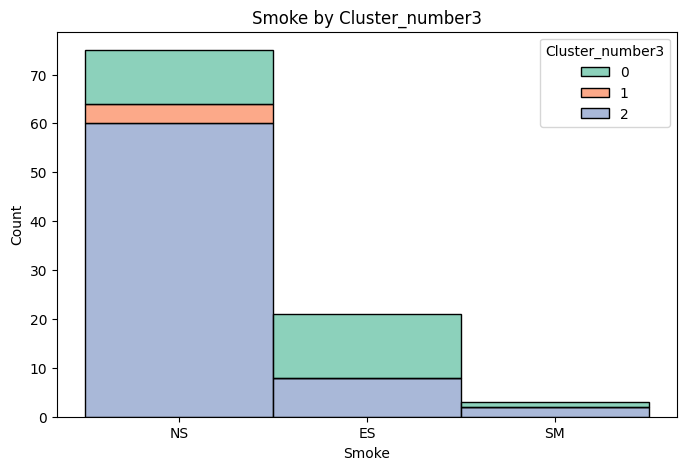

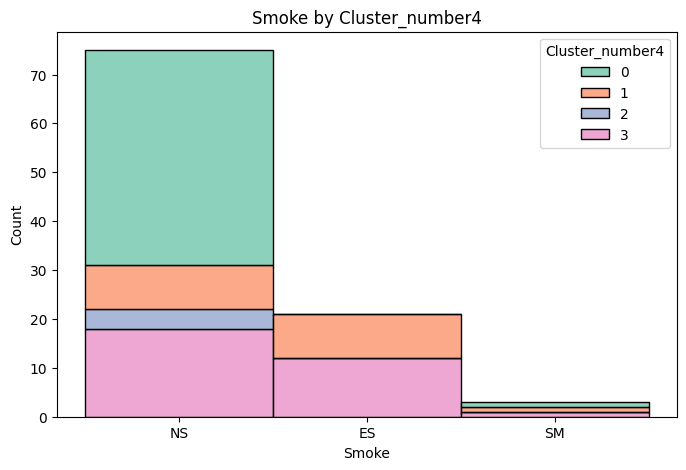

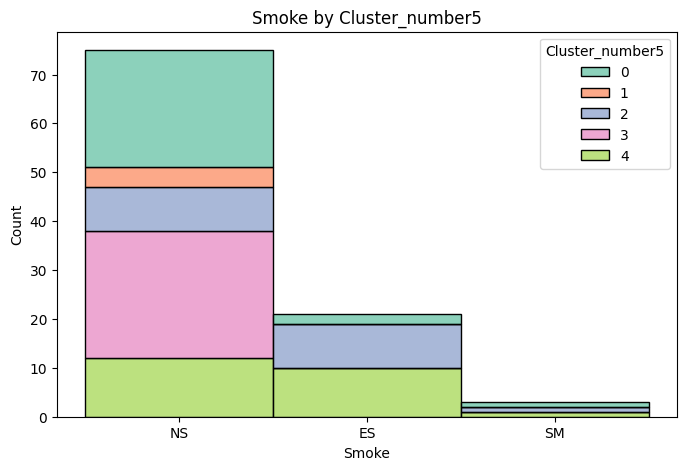

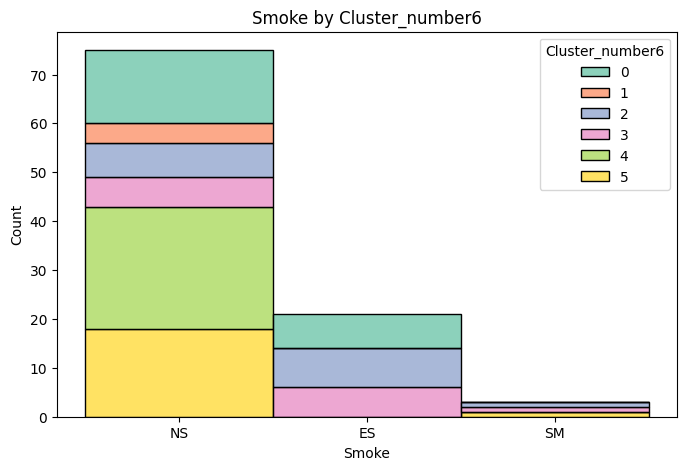

In [126]:
# plt.figure(figsize=(8,5))

# sns.histplot(data=data, x='Smoke', hue='Cluster_number3', multiple='stack',palette='Set2')
# plt.title('Smoker by Cluster_number3')
# plt.show()


for cluster_col in cluster_columns:
    plt.figure(figsize=(8,5))
    sns.histplot(data=data, x='Smoke', hue=cluster_col, multiple='stack', palette='Set2')
    
    plt.title(f'Smoke by {cluster_col}')
    plt.show()

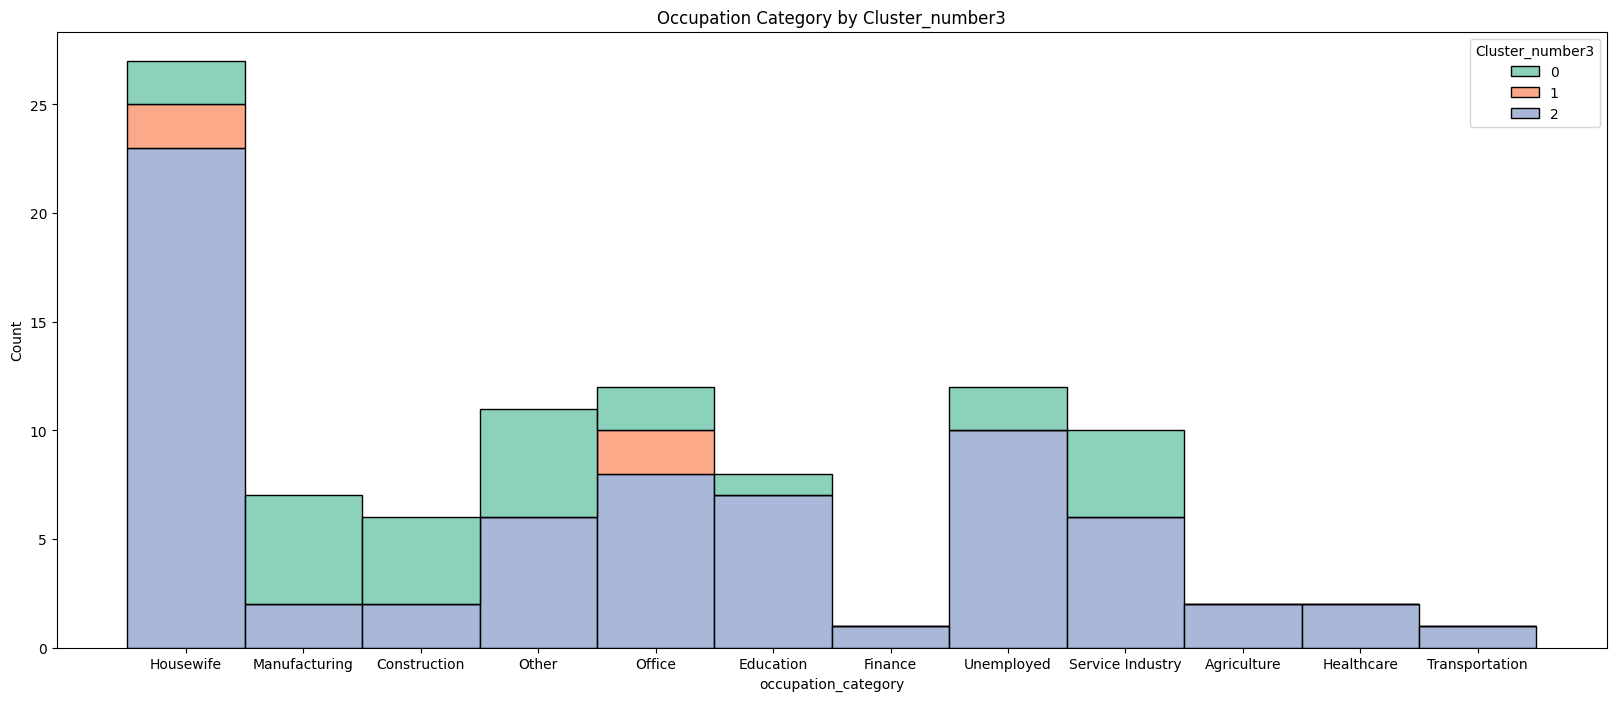

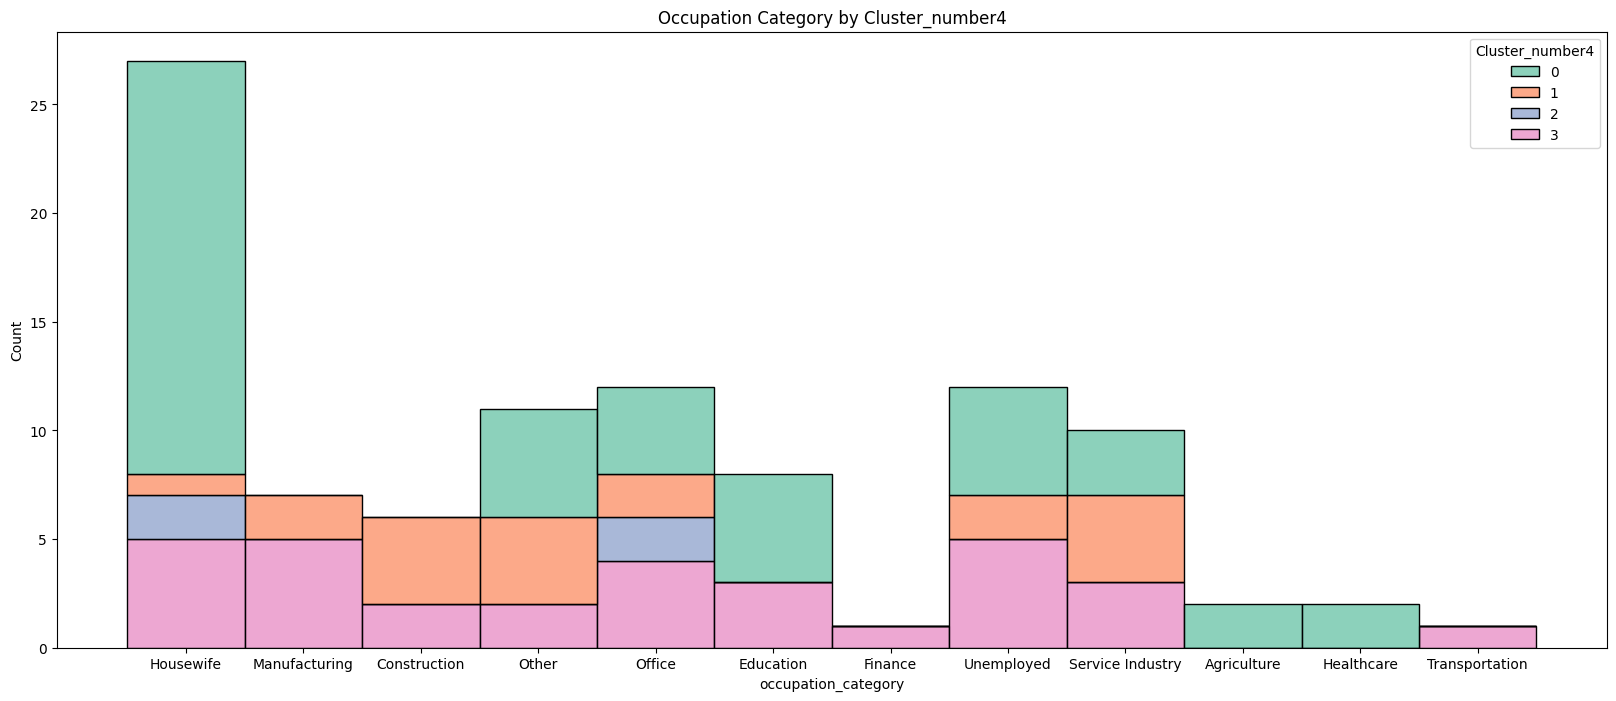

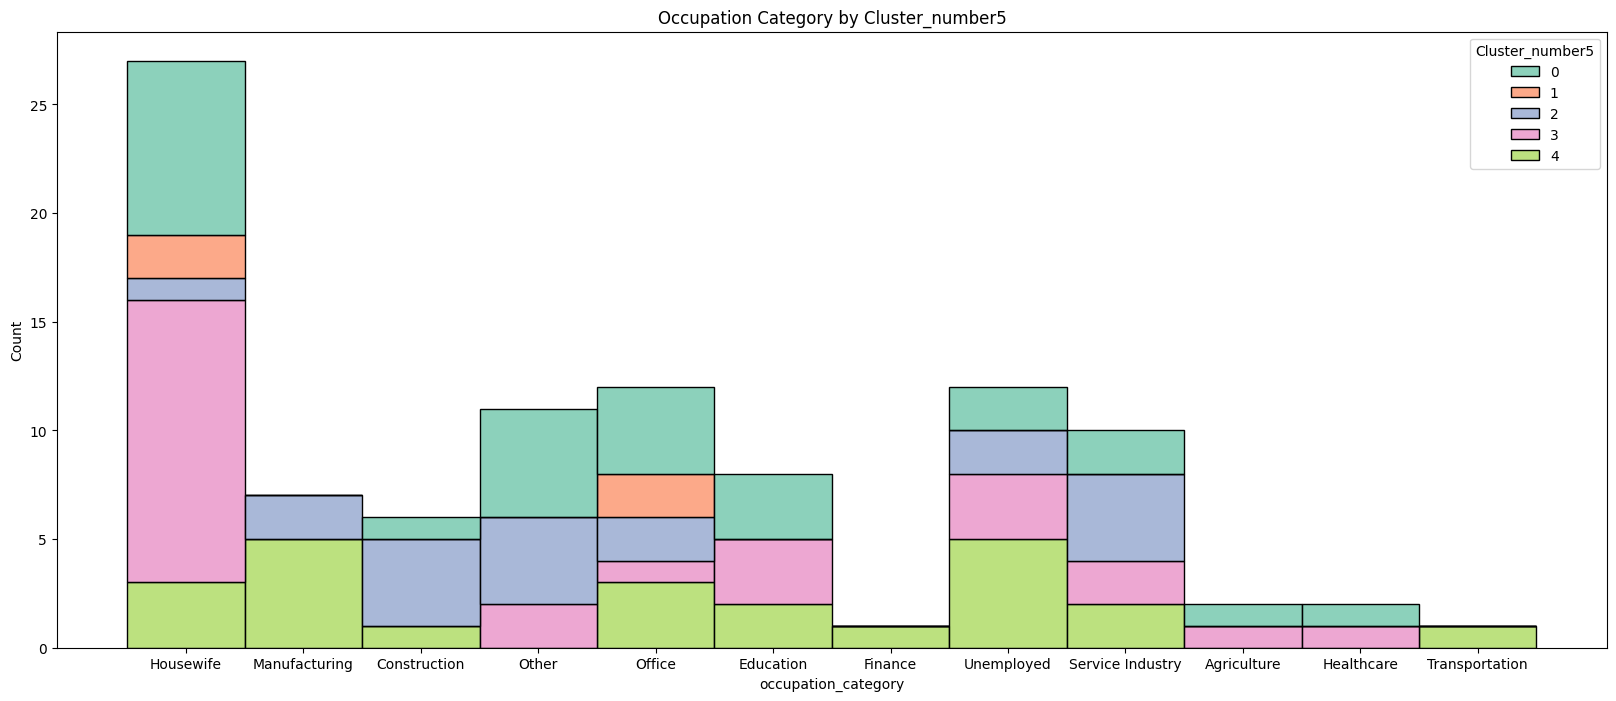

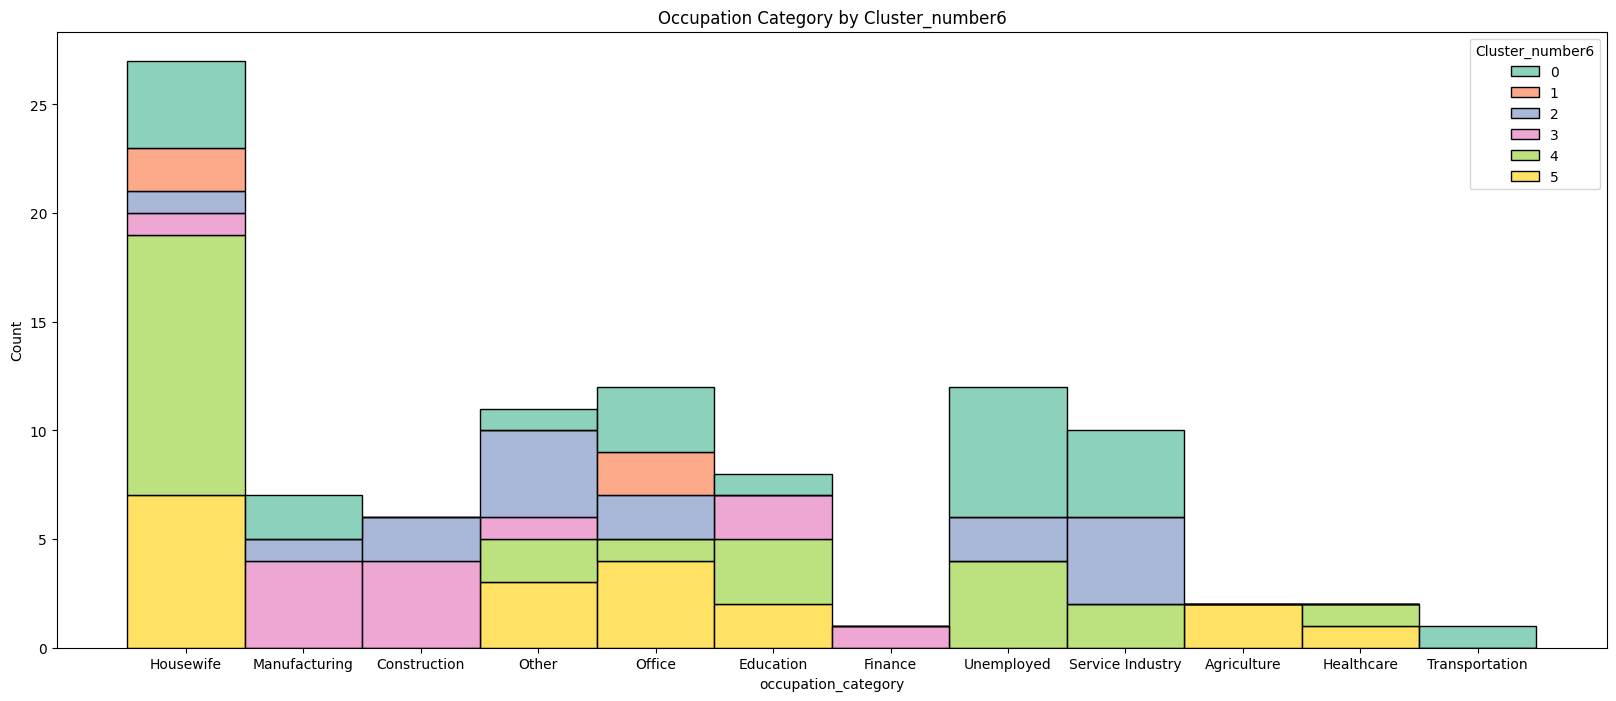

In [127]:
# plt.figure(figsize=(20,8))

# sns.histplot(data=data, x='occupation_category', hue='Cluster_number3', multiple='stack', palette='Set2')
# plt.title('Occupation Category by Cluster_number3')
# plt.show()
for cluster_col in cluster_columns:
    plt.figure(figsize=(20,8))
    sns.histplot(data=data, x='occupation_category', hue=cluster_col, multiple='stack', palette='Set2')
    
    plt.title(f'Occupation Category by {cluster_col}')
    plt.show()

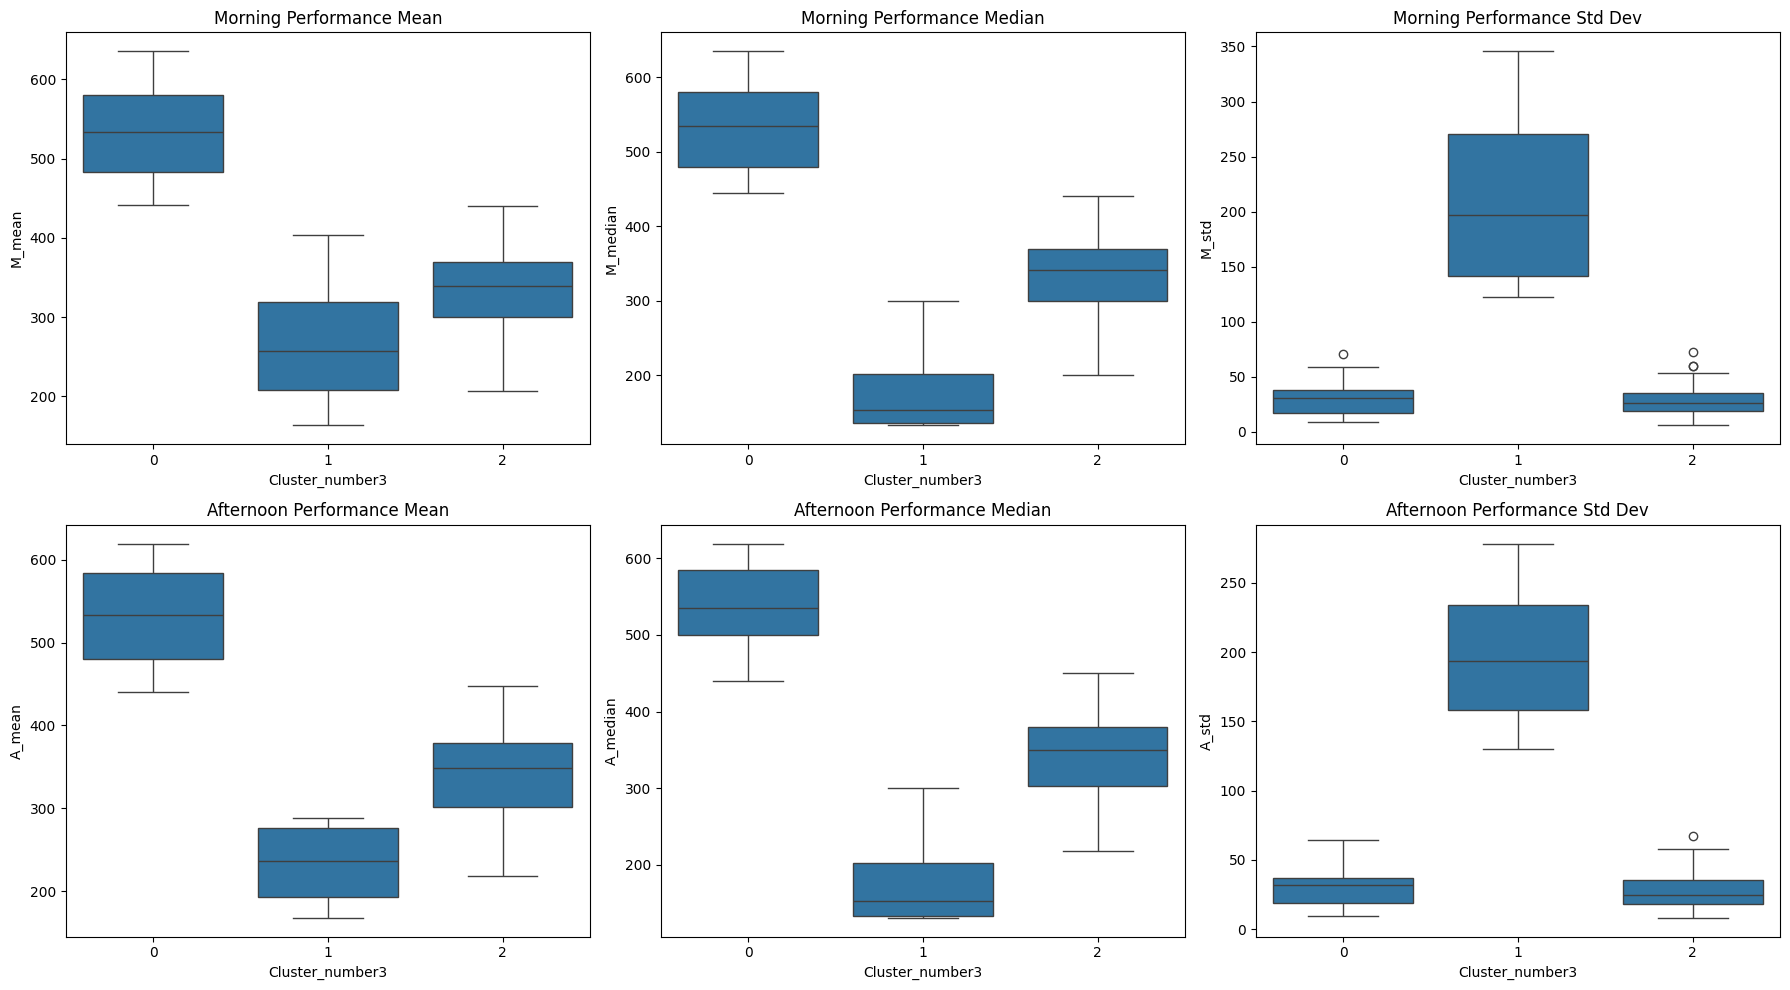

In [128]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

metrics = {
    'M_mean': 'Morning Performance Mean',
    'M_median': 'Morning Performance Median',
    'M_std': 'Morning Performance Std Dev',
    'A_mean': 'Afternoon Performance Mean',
    'A_median': 'Afternoon Performance Median',
    'A_std': 'Afternoon Performance Std Dev'
}

for i, (metric, title) in enumerate(metrics.items()):
    row = i // 3
    col = i % 3
    sns.boxplot(x='Cluster_number3', y=metric, data=data, ax=axes[row, col])
    axes[row, col].set_title(title)

plt.tight_layout()
plt.show()

/var/folders/dm/k1b389n52rl0zc37y566h6c80000gn/T/ipykernel_30124/2191779186.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_col, y=metric, data=data, ax=axes[idx], palette=palettes[cluster_col])
/var/folders/dm/k1b389n52rl0zc37y566h6c80000gn/T/ipykernel_30124/2191779186.py:29: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x=cluster_col, y=metric, data=data, ax=axes[idx], palette=palettes[cluster_col])
/var/folders/dm/k1b389n52rl0zc37y566h6c80000gn/T/ipykernel_30124/2191779186.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_col, y=metric, data=data, ax=axes[idx], pale

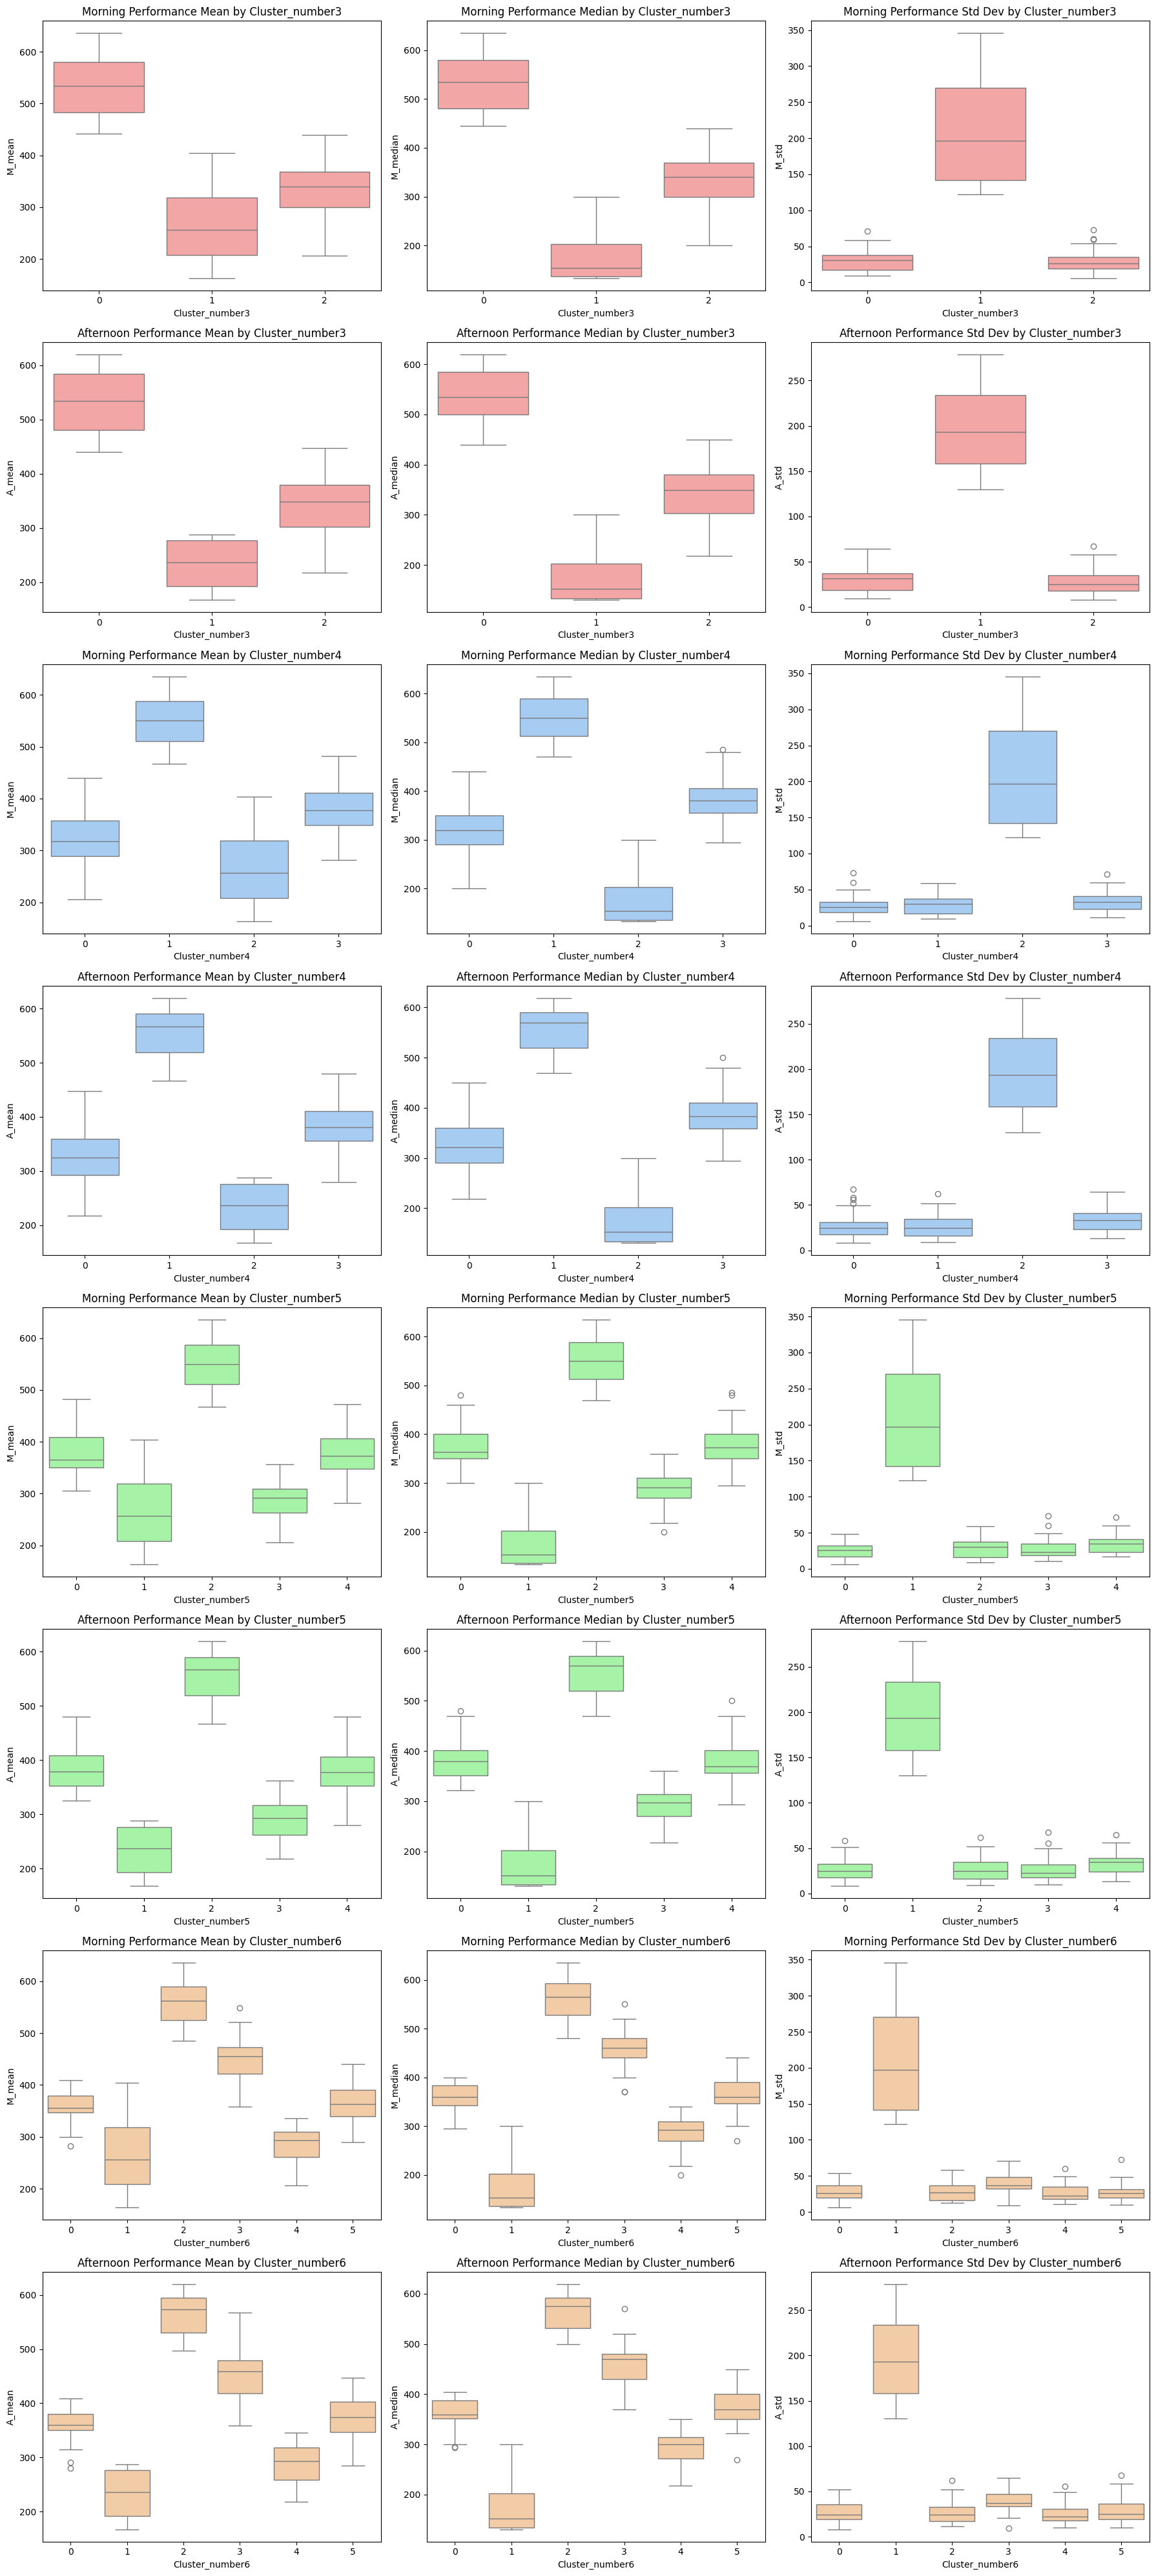

In [129]:
metrics = {
    'M_mean': 'Morning Performance Mean',
    'M_median': 'Morning Performance Median',
    'M_std': 'Morning Performance Std Dev',
    'A_mean': 'Afternoon Performance Mean',
    'A_median': 'Afternoon Performance Median',
    'A_std': 'Afternoon Performance Std Dev'
}

cluster_columns = ['Cluster_number3', 'Cluster_number4', 'Cluster_number5', 'Cluster_number6']

# Assign a single color for each cluster column
palettes = {
    'Cluster_number3': ['#FF9999'],  # Light Red
    'Cluster_number4': ['#99CCFF'],  # Light Blue
    'Cluster_number5': ['#99FF99'],  # Light Green
    'Cluster_number6': ['#FFCC99'],  # Light Orange
}

# Define the number of rows and columns (3 box plots in a row)
num_rows = (len(cluster_columns) * len(metrics) + 2) // 3  # Ceiling of (total plots / 3)
fig, axes = plt.subplots(num_rows, 3, figsize=(18, num_rows * 5))

axes = axes.flatten()  # Flatten to simplify plotting

for i, cluster_col in enumerate(cluster_columns):
    for j, (metric, title) in enumerate(metrics.items()):
        idx = i * len(metrics) + j
        sns.boxplot(x=cluster_col, y=metric, data=data, ax=axes[idx], palette=palettes[cluster_col])
        axes[idx].set_title(f"{title} by {cluster_col}")

# Hide empty axes if any
for k in range(idx + 1, len(axes)):
    fig.delaxes(axes[k])

plt.tight_layout()
plt.show()


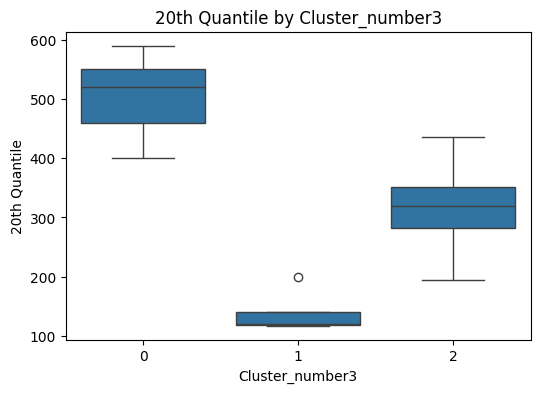

In [130]:
# plt.figure(figsize=(6, 4))
# sns.boxplot(x='Cluster_number3', y='20th_quantile', data=data)
# plt.title('20th Quantile by Cluster_number3')
# plt.xlabel('Cluster_number3')
# plt.ylabel('20th Quantile')
# plt.show()



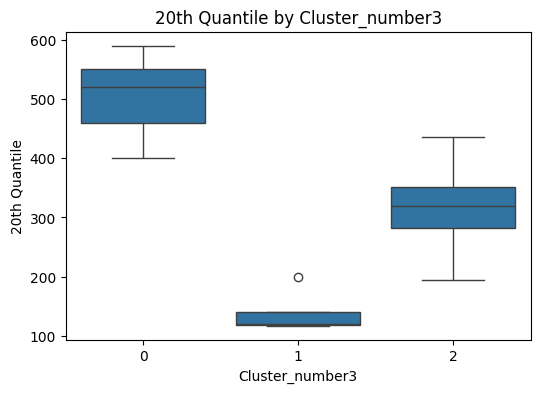

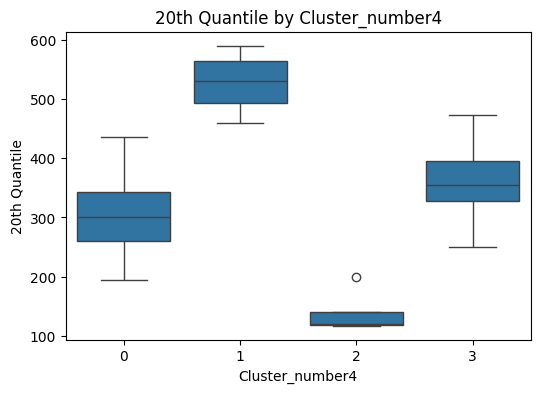

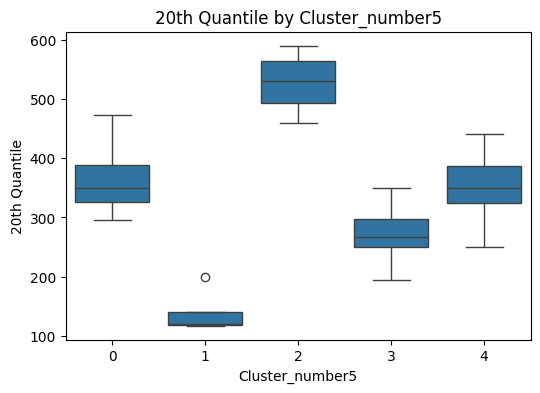

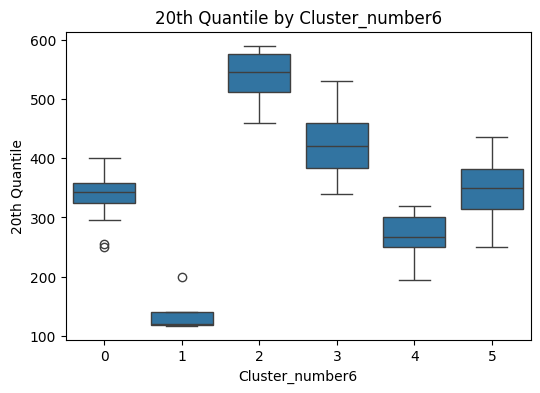

In [131]:
for cluster_col in cluster_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=cluster_col, y='20th_quantile', data=data)
    plt.title(f'20th Quantile by {cluster_col}')
    plt.xlabel(cluster_col)
    plt.ylabel('20th Quantile')
    plt.show()